# SDM Demo
We will demonstrate a simple distribution to regregression example. The task is to predict entropy of the distribution from the given samples.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import sdm

## Generate Data
Generates input-output data for supervised entropy learning. Generate samples from 2D Gaussian of different entropy values obtained by rotation.

In [175]:
L = 1000     #number of different distributions (100 train, 50 validation, 50 test)
N = 1000    #number of samples per distribution
d = 2       #dimenson


A = np.array([[2.0,1.0],[1.0,1.0]])/2.0 #np.random.rand(d,d)
X_parameter = np.linspace(0,np.pi,L)  #rotation angles

X = []
y = []
t = np.linspace(0,np.pi,L)
for rot in t:
    A_nL = np.array([[np.cos(rot), -np.sin(rot)],[np.sin(rot),np.cos(rot)]]) * A;
    X_nL = np.dot(A_nL, np.random.randn(d, N)).T #bag representing a rotated normal distribution
    X.append(X_nL)
    
    M = np.dot(A_nL, A_nL.T)
    s = M[0,0]
    y.append(0.5 * np.log(2*np.pi*np.exp(1)*s*s));

X = np.array(X)
y = np.array(y)
y_in_order = np.copy(y)

# randomly permute
p = np.random.permutation(L)
t = t[p]
X = X[p]
y = y[p]

In [188]:
X_train = X[:900]
y_train = y[:900]
t_train = t[:900]

X_test = X[900:]
y_test = y[900:]
t_test = t[900:]

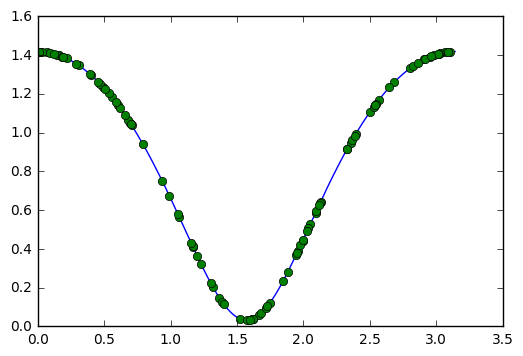

In [189]:
plt.plot(np.linspace(0,np.pi,L), y_in_order)
plt.plot(t_test, y_test, 'o')
plt.show()

## Learn Kernel

In [191]:
clf = sdm.NuSDR()
clf.fit(list(X_train), y_train)

In [192]:
y_pred = clf.predict(list(X_test))

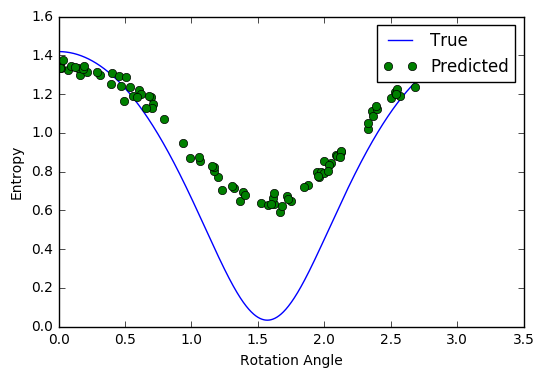

In [193]:
plt.plot(np.linspace(0,np.pi,L), y_in_order)
plt.plot(t_test, y_pred, 'o')
plt.xlabel('Rotation Angle')
plt.ylabel('Entropy')
plt.legend(['True', 'Predicted'])
plt.show()